<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h1>Aprendizaje No Supervisado</h1>
<h2>Práctico 1 - Clustering</h2>
<hr>
Por David Gonzalez <leonardo.david.gonzalez@gmail.com> y Facundo Díaz Cobos <facundo.diaz.cobos@gmail.com>
</center>
<br/>

## Objetivos
En este práctico se explorarán diferentes soluciones de clustering, para desarrollar las capacidades de análisis de
soluciones de clustering. Es preferible que los conjuntos de datos con los que trabajar sean propios, ya que de esta
forma podrán aplicar su conocimiento del dominio en la interpretación de las diferentes soluciones. Alternativa-
mente, pueden usar conjuntos de datos de los ejemplos de la materia.
En los mismos, hacer una breve discusión del problema y explicar cómo puede ser útil usar técnicas de clustering.

# Consignas
Para cumplir los objetivos, realizar las siguientes actividades:

1 - Explorar soluciones con diferentes parámetros y compararlas. Por ejemplo, variar el número de clusters, las
métricas de distancia, el número de iteraciones o el número de veces que se inicializan las semillas. Describir
brevemente: número de clusters, población de cada cluster, algunas caracterı́sticas distintivas de cada cluster,
algunos elementos que se puedan encontrar en cada cluster.

2 - Incorporar un embedding como preproceso a los datos, aplicar los algoritmos de clustering después de ese
preproceso y describir la solución o soluciones resultantes, discutiendo las ventajas que resultan. Se pueden
usar:

◦ Principal
Component Analysis http://scikit-learn.org/stable/modules/generated/sklearn.
decomposition.PCA.html

◦ para texto, embeddings neuronales Gensim https://pypi.org/project/gensim/

◦ para texto, embeddings neuronales Fastext https://pypi.org/project/fasttext/

3 - Proponer (y en lo posible, implementar) métricas de evaluación de soluciones de clustering basadas en testigos.
Los testigos son pares de objetos que un experto de dominio etiqueta como “deberı́an estar en el mismo cluster”
o “deberı́an estar en distintos clusters”.

4 - El método k-means de scikit-learn no provee una forma sencilla de obtneer los objetos más cercanos al centroide
de un cluster. Proponga alguna forma de obtener una muestra de los elementos de un cluster que sean cercanos
al centroide, por ejemplo, usando clasificadores, usando distancia coseno, etc. En lo posible, implementarlos y
mostrar esos elementos, discutir la representatividad de los elementos encontrados.

# <u>RESOLUCIÓN</u>

# Importando los datos:
Vamos a trabajar un set de datos correspondiente a compras reales de clientes realizadas en el año 2017. Los clientes fueron anonimizados previamente para poder ser utilizados en el ejercicio.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from yellowbrick.cluster.elbow import KElbowVisualizer
from sklearn.cluster import KMeans
from datetime import datetime

import numpy as np
np.random.seed(0)

# Configuramos el tamaño de los gráficos, en pulgadas
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

In [2]:
from util import check_dataset
check_dataset()

* Chequeando dataset de trabajo...
- Dataset OK.


In [3]:
from util import load_dataset
ventas_df = load_dataset()

* Importando dataset...
 - 1677680 registros importados.


# 1 - Explorar soluciones con diferentes parámetros y compararlas:

In [4]:
from IPython.display import display, HTML

In [5]:
display(HTML('<b>* Cantidad de Features: {0}</b>'.format(len(ventas_df.columns))))

In [6]:
ventas_df.columns

Index(['Unnamed: 0', 'CODIGO_CLIENTE', 'RAZON_SOCIAL', 'CUIT', 'CATEGORIA_IVA',
       'GRUPO_CANAL', 'CANAL', 'SUBCANAL', 'APERTURA_ADICIONAL', 'CATEGORIA',
       'ZONA', 'ZONA_REPARTO', 'CONDICION_VENTA', 'CREDITO_MAXIMO',
       'CREDITO_MONEDA', 'LISTA_PRECIOS', 'AGENTE_RETENCION',
       'DIAS_TOLERANCIA_COBRO', 'GRUPO', 'SOCIEDAD_JURIDICA', 'ESTADO',
       'MOTIVO_ESTADO', 'ESQUEMA_COMERCIAL', 'FACTURA_CODIGO',
       'FACTURA_NUM_ID', 'FACTURA_SUCURSAL', 'FACTURA_FECHA',
       'FACTURA_MONTO_TOTAL', 'FACTURA_COND_VENTA', 'FACTURA_VENDEDOR',
       'CODIGO_ARTICULO', 'AGRUPACION_1', 'AGRUPACION_2', 'AGRUPACION_3',
       'AGRUPACION_4', 'AGRUPACION_5', 'AGRUPACION_6', 'CANTIDAD',
       'UNIDAD_MEDIDA', 'PRECIO_UNITARIO', 'PRECIO_TOTAL'],
      dtype='object')

In [7]:
ventas_df.head()

,Unnamed: 0,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,...,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
0,0,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,...,012,122,253,012,080,001,1.0,UN,21.5519,26.08
1,1,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,...,012,425,700,012,080,001,1.0,UN,10.4264,12.62
2,2,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,RI,100,100,106,106,C,...,003,185,220,003,033,001,6.0,UN,15.0361,109.16
3,3,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,RI,100,100,106,106,C,...,091,034,101,003,021,001,12.0,UN,8.0380,116.72
4,4,d7b59972e86f00e016b54288826786ae,24dc84bc7bc604e81717f2356fbd278b,4334910e09a671816fe006c0d9b9beb8,RM,000,010,010,010,A,...,012,302,402,012,126,001,6.0,UN,14.3429,104.13


In [8]:
display(HTML('<b>* Cantidad de Clientes: {0}</b>'.format(len(ventas_df.CODIGO_CLIENTE.unique()))))

In [9]:
display(HTML('<b>* Cantidad de Artículos diferentes Vendidos: {0}</b>'.format(len(ventas_df.CODIGO_ARTICULO.unique()))))

## * Clusterizaremos clientes por su comportamiento de compra:

CASO PROPUESTO: El experto de dominio necesita saber cuales son los clientes que poseen comportamiento de compra similar en el año 2017.  

Configuramos el dataset para contemplar lo solicitado:

In [10]:

data_df = ventas_df[['CODIGO_CLIENTE', 'CANAL', 'SUBCANAL', 'FACTURA_NUM_ID','FACTURA_FECHA', 'CODIGO_ARTICULO', 'CANTIDAD', 'PRECIO_TOTAL' ]] 
data_df.insert( 1,'YEAR', data_df['FACTURA_FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d 00:00:00').year ))
data_df.insert( 2,'MONTH', data_df['FACTURA_FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d 00:00:00').month  ))
data_df.insert( 3,'DAY', data_df['FACTURA_FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d 00:00:00').day ))
data_df = data_df.drop(columns='FACTURA_FECHA')
data_df = data_df[data_df['YEAR'] == 2017]


In [11]:
data_df.head()

,CODIGO_CLIENTE,YEAR,MONTH,DAY,CANAL,SUBCANAL,FACTURA_NUM_ID,CODIGO_ARTICULO,CANTIDAD,PRECIO_TOTAL
0,c4798d1002b95e5b0f16f09c62c95e06,2017,1,2,010,010,297574e436e7466386da63886436195b,000-000-6673,1.0,26.08
1,c4798d1002b95e5b0f16f09c62c95e06,2017,1,2,010,010,297574e436e7466386da63886436195b,000-000-11000,1.0,12.62
2,75eed0dd5091ba851cb1082f5c600404,2017,1,2,100,106,44cd8f14e89c775c390d2d282735057a,000-000-9800,6.0,109.16
3,75eed0dd5091ba851cb1082f5c600404,2017,1,2,100,106,44cd8f14e89c775c390d2d282735057a,000-000-6742,12.0,116.72
4,d7b59972e86f00e016b54288826786ae,2017,1,2,010,010,e9db0c1d04bba69d87e81808c012272a,000-000-11557,6.0,104.13


In [12]:
ppc_df = ( data_df[['CODIGO_CLIENTE', 'CODIGO_ARTICULO', 'CANTIDAD', 'PRECIO_TOTAL']]
        .groupby(['CODIGO_CLIENTE','CODIGO_ARTICULO'])
        .agg({'CANTIDAD': 'sum', 'PRECIO_TOTAL': 'sum'})
    ).reset_index()    

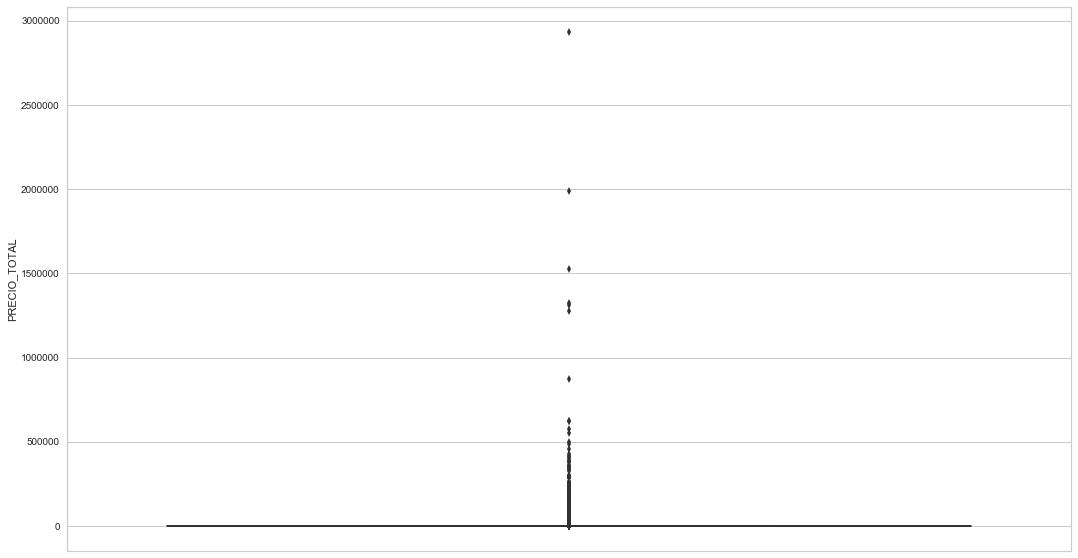

In [13]:
plt.clf()
sns.boxplot(y=ppc_df.PRECIO_TOTAL)
plt.show()

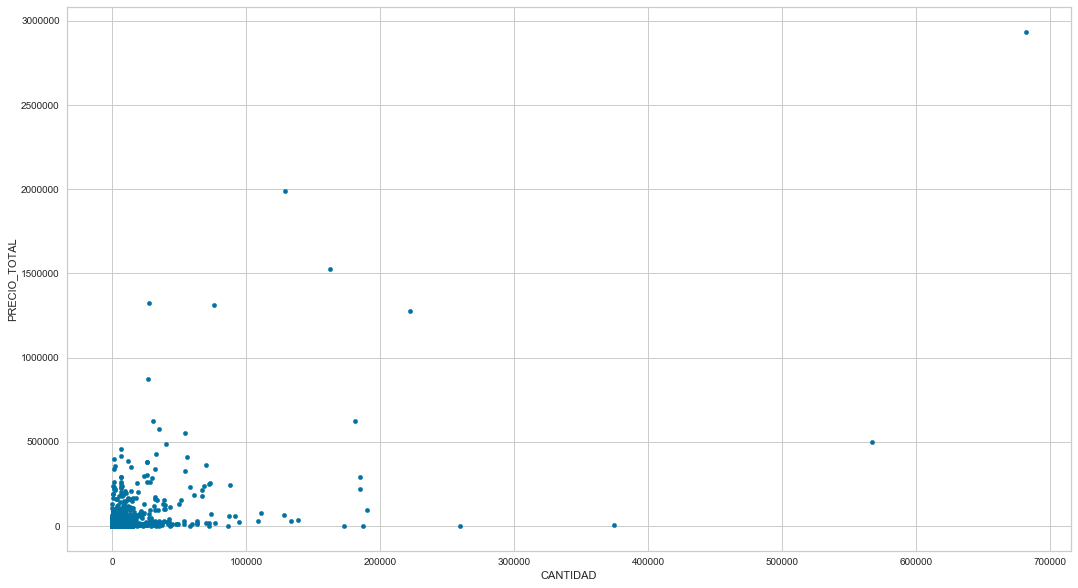

In [14]:
plt.clf()
ppc_df.plot(kind='scatter', x='CANTIDAD', y='PRECIO_TOTAL');
plt.show()

In [15]:
with pd.option_context('display.float_format', lambda x: '{:,.3f}'.format(x)):
    display(ppc_df.PRECIO_TOTAL.describe())

count     326,639.000
mean          706.229
std         9,495.281
min             0.030
25%            71.090
50%           169.610
75%           459.500
max     2,934,472.430
Name: PRECIO_TOTAL, dtype: float64

In [16]:
# Removemos los outliers y revisamos:
ppc_df = ppc_df[np.abs(ppc_df.PRECIO_TOTAL-ppc_df.PRECIO_TOTAL.mean()) <= (3*ppc_df.PRECIO_TOTAL.std())]

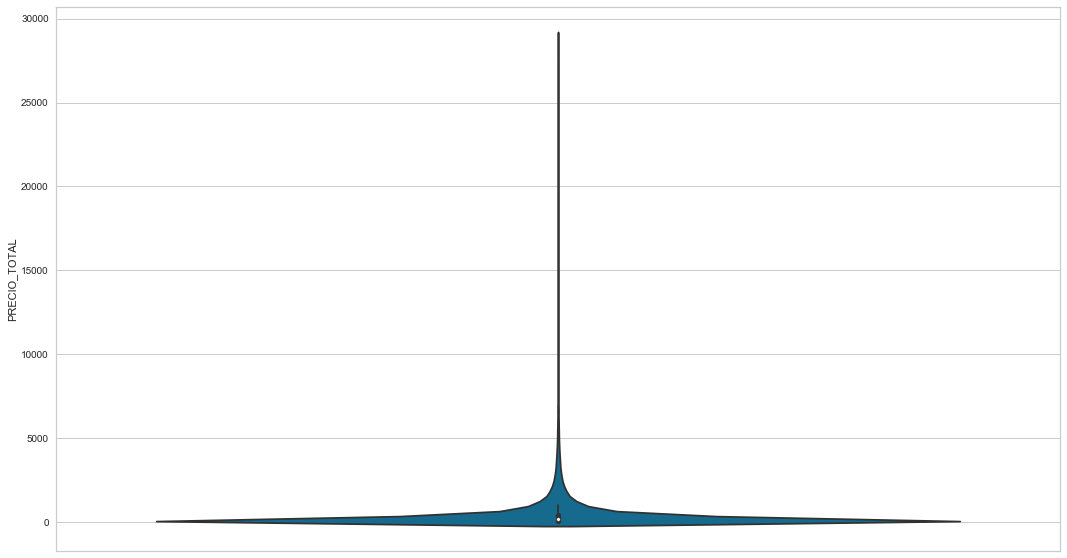

In [17]:
plt.clf()
sns.violinplot(y=ppc_df.PRECIO_TOTAL)
plt.show()

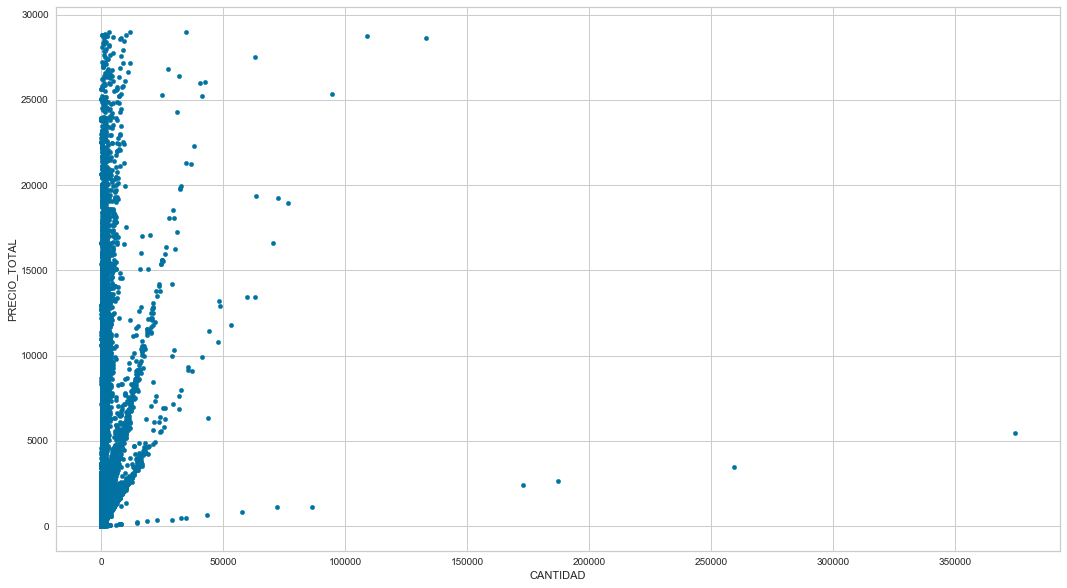

In [18]:
plt.clf()
ppc_df.plot(kind='scatter', x='CANTIDAD', y='PRECIO_TOTAL');
plt.show()

In [19]:
with pd.option_context('display.float_format', lambda x: '{:,.3f}'.format(x)):
    display(ppc_df.PRECIO_TOTAL.describe())

count   326,127.000
mean        538.987
std       1,426.560
min           0.030
25%          71.030
50%         169.340
75%         456.615
max      28,981.160
Name: PRECIO_TOTAL, dtype: float64

In [20]:
# Ok, ahora obtenemos cantidades de productos por clientes en una matriz
ppcp_df = pd.DataFrame( ppc_df.pivot(index='CODIGO_CLIENTE', columns='CODIGO_ARTICULO', values='CANTIDAD').fillna(0).to_records() ).set_index('CODIGO_CLIENTE')

In [21]:
ppcp_df.head()

,000-000-0236,000-000-0241,000-000-0245,000-000-0248,000-000-0256,000-000-0296,000-000-0299,000-000-0634,000-000-0639,000-000-0646,...,000-999-ag11946,000-999-c10976,000-999-c10977,000-999-c11011,000-999-c11166,000-999-c11857,000-999-c3436,000-999-c3747,000-999-d4532,000-999-d5883
CODIGO_CLIENTE,,,,,,,,,,,,,,,,,,,,,
0024531e81828540871212e10c896d71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003c44afe6e90ba8848dfd2bdd92c03f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
004a4de5dd7ab3c72b8f86fe635bb9b8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00a1e834d044753f4e47964143a5e904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00bb302b07a498a606e061579e962c45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Normalizamos los datos
ppcp_norm=(ppcp_df-ppcp_df.min())/(ppcp_df.max()-ppcp_df.min())

In [23]:
ppcp_norm.describe()

,000-000-0236,000-000-0241,000-000-0245,000-000-0248,000-000-0256,000-000-0296,000-000-0299,000-000-0634,000-000-0639,000-000-0646,...,000-999-ag11946,000-999-c10976,000-999-c10977,000-999-c11011,000-999-c11166,000-999-c11857,000-999-c3436,000-999-c3747,000-999-d4532,000-999-d5883
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,...,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000
mean,0.002774,0.002699,0.001865,0.000985,0.004467,0.002628,0.005899,0.003437,0.003373,0.004793,...,0.001085,0.000762,0.000921,0.002934,0.001842,0.001023,0.002831,0.000785,0.000921,0.000782
std,0.041305,0.033533,0.030044,0.023395,0.036201,0.029830,0.042073,0.037605,0.030611,0.041130,...,0.026300,0.022586,0.025278,0.050505,0.033507,0.021373,0.033225,0.022199,0.025024,0.022234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


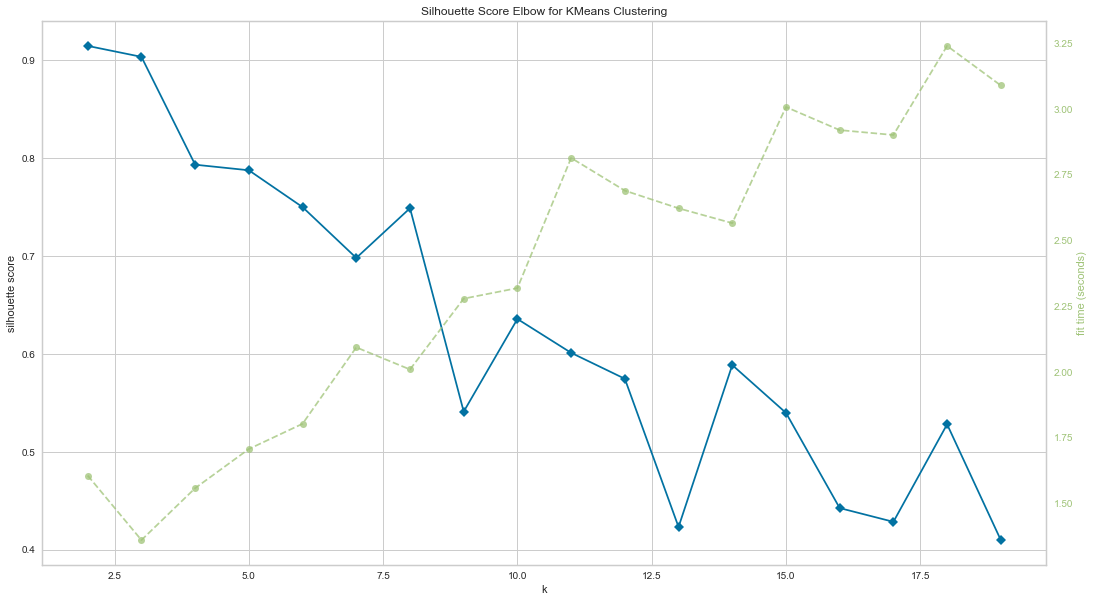

In [24]:
# Clusterizamos los clientes segun la similaridad de los productos que compran
plt.clf()
clusterClientes = KElbowVisualizer(KMeans(), k=(2,20), metric='silhouette')
clusterClientes.fit(ppcp_norm)
clusterClientes.poof()
plt.show()

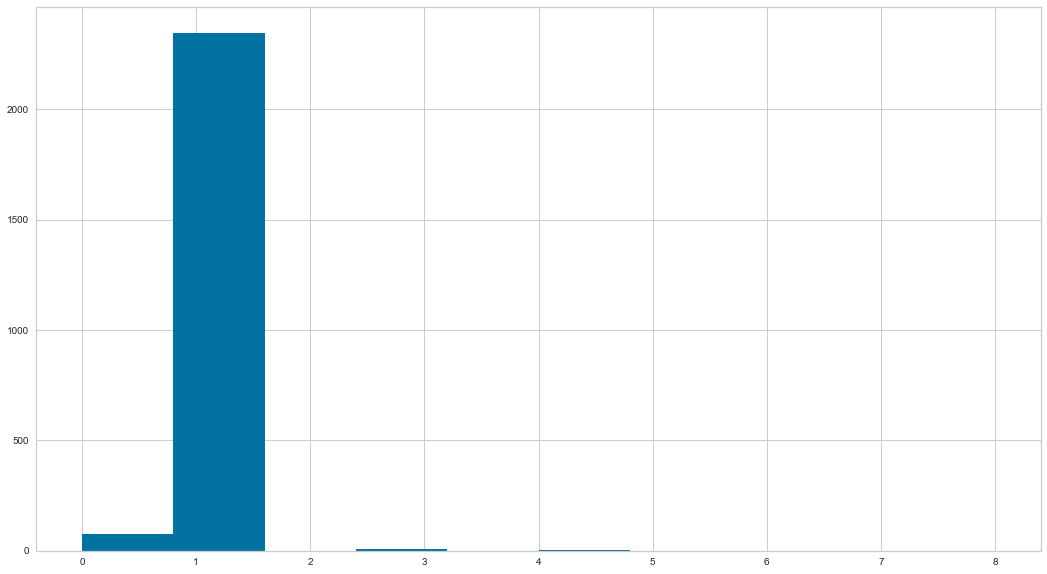

In [25]:
num_clusters = 9

# Ejecutamos la clusterización por la cantidad de clusters seleccionada:

np.random.seed(0)
ppcp_kmeans = KMeans(n_clusters=num_clusters)
ppcp_df['CLUSTER'] = ppcp_kmeans.fit_predict(ppcp_norm)

ppcp_df.CLUSTER.hist()
plt.show()

Se generaron grupos pero estan muy desbalanceados. Veremos de reducir la dimensionalidad y reintentaremos.

# 2 - Incorporar un embedding como preproceso a los datos:

In [26]:
# DROP labels with no information
df = ventas_df
df = df.drop(['CODIGO_CLIENTE', 'CUIT', 'RAZON_SOCIAL','FACTURA_CODIGO', 'Unnamed: 0', 'LISTA_PRECIOS'], axis=1)
df = df.drop(['CODIGO_ARTICULO', 'FACTURA_VENDEDOR', 'FACTURA_COND_VENTA','FACTURA_FECHA', 'FACTURA_NUM_ID', 'ZONA_REPARTO', 'ZONA'], axis=1)


df[:3]

,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,CONDICION_VENTA,CREDITO_MAXIMO,CREDITO_MONEDA,AGENTE_RETENCION,...,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
0,RM,000,010,010,010,A,07,0.0,PES,False,...,012,122,253,012,080,001,1.0,UN,21.5519,26.08
1,RM,000,010,010,010,A,07,0.0,PES,False,...,012,425,700,012,080,001,1.0,UN,10.4264,12.62
2,RI,100,100,106,106,C,14,0.0,PES,False,...,003,185,220,003,033,001,6.0,UN,15.0361,109.16


In [27]:
from sklearn import preprocessing

# Create a label (category) encoder object
le_cat_iva = preprocessing.LabelEncoder()
le_cat = preprocessing.LabelEncoder()
le_cred_mon = preprocessing.LabelEncoder()
le_soc_jur = preprocessing.LabelEncoder()
le_estado = preprocessing.LabelEncoder()
le_mot_estado = preprocessing.LabelEncoder()
le_esq_com = preprocessing.LabelEncoder()
le_fac_cod = preprocessing.LabelEncoder()
le_uni_med = preprocessing.LabelEncoder()

le_ag_1 = preprocessing.LabelEncoder()
le_ag_2 = preprocessing.LabelEncoder()
le_ag_3 = preprocessing.LabelEncoder()
le_ag_4 = preprocessing.LabelEncoder()
le_ag_5 = preprocessing.LabelEncoder()
le_ag_6 = preprocessing.LabelEncoder()
le_con_venta = preprocessing.LabelEncoder()
le_grupo = preprocessing.LabelEncoder()
le_grupo_canal = preprocessing.LabelEncoder()
le_canal = preprocessing.LabelEncoder()
le_subcanal = preprocessing.LabelEncoder()
le_apertura_adicional = preprocessing.LabelEncoder()


# Fit the encoder to the pandas column
le_cat_iva.fit(df["CATEGORIA_IVA"])
le_cat.fit(df["CATEGORIA"])
le_estado.fit(df["ESTADO"])
le_uni_med.fit(df["UNIDAD_MEDIDA"])
le_esq_com.fit(df["ESQUEMA_COMERCIAL"].astype(str))
le_mot_estado.fit(df["MOTIVO_ESTADO"].astype(str))
le_cred_mon.fit(df["CREDITO_MONEDA"].astype(str))
le_soc_jur.fit(df["SOCIEDAD_JURIDICA"].astype(str))

le_ag_1.fit(df['AGRUPACION_1'].astype(str)) 
le_ag_2.fit(df['AGRUPACION_2'].astype(str)) 
le_ag_3.fit(df['AGRUPACION_3'].astype(str)) 
le_ag_4.fit(df['AGRUPACION_4'].astype(str)) 
le_ag_5.fit(df['AGRUPACION_5'].astype(str)) 
le_ag_6.fit(df['AGRUPACION_6'].astype(str)) 
le_con_venta.fit(df["CONDICION_VENTA"])
le_grupo.fit(df["GRUPO"])
le_grupo_canal.fit(df["GRUPO_CANAL"])
le_canal.fit(df["CANAL"])
le_subcanal.fit(df["SUBCANAL"])
le_apertura_adicional.fit(df["APERTURA_ADICIONAL"])

# Apply the fitted encoder to the pandas column
df["CATEGORIA_IVA"] = le_cat_iva.transform(df["CATEGORIA_IVA"]) 
df["CATEGORIA"] = le_cat.transform(df["CATEGORIA"]) 
df["ESTADO"] = le_estado.transform(df["ESTADO"]) 
df["UNIDAD_MEDIDA"] = le_uni_med.transform(df["UNIDAD_MEDIDA"]) 
df["ESQUEMA_COMERCIAL"] = le_esq_com.transform(df["ESQUEMA_COMERCIAL"].astype(str)) 
df["MOTIVO_ESTADO"] = le_mot_estado.transform(df["MOTIVO_ESTADO"].astype(str)) 
df["CREDITO_MONEDA"] = le_cred_mon.transform(df["CREDITO_MONEDA"].astype(str)) 
df["SOCIEDAD_JURIDICA"] = le_soc_jur.transform(df["SOCIEDAD_JURIDICA"].astype(str)) 

df['AGRUPACION_1'] = le_ag_1.transform(df['AGRUPACION_1'].astype(str)) 
df['AGRUPACION_2'] = le_ag_2.transform(df['AGRUPACION_2'].astype(str)) 
df['AGRUPACION_3'] = le_ag_3.transform(df['AGRUPACION_3'].astype(str)) 
df['AGRUPACION_4'] = le_ag_4.transform(df['AGRUPACION_4'].astype(str)) 
df['AGRUPACION_5'] = le_ag_5.transform(df['AGRUPACION_5'].astype(str)) 
df['AGRUPACION_6'] = le_ag_6.transform(df['AGRUPACION_6'].astype(str)) 
df["CONDICION_VENTA"] = le_con_venta.transform(df["CONDICION_VENTA"])
df["GRUPO"] = le_grupo.transform(df["GRUPO"])
df["GRUPO_CANAL"] = le_grupo_canal.transform(df["GRUPO_CANAL"])
df["CANAL"] = le_canal.transform(df["CANAL"])
df["SUBCANAL"] = le_subcanal.transform(df["SUBCANAL"])
df["APERTURA_ADICIONAL"] = le_apertura_adicional.transform(df["APERTURA_ADICIONAL"])


In [28]:
df[:3]

,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,CONDICION_VENTA,CREDITO_MAXIMO,CREDITO_MONEDA,AGENTE_RETENCION,...,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
0,4,0,2,8,7,0,1,0.0,0,False,...,4,51,111,4,46,0,1.0,2,21.5519,26.08
1,4,0,2,8,7,0,1,0.0,0,False,...,4,146,267,4,46,0,1.0,2,10.4264,12.62
2,3,1,5,21,26,3,2,0.0,0,False,...,1,64,96,2,26,0,6.0,2,15.0361,109.16


In [29]:
df.columns

Index(['CATEGORIA_IVA', 'GRUPO_CANAL', 'CANAL', 'SUBCANAL',
       'APERTURA_ADICIONAL', 'CATEGORIA', 'CONDICION_VENTA', 'CREDITO_MAXIMO',
       'CREDITO_MONEDA', 'AGENTE_RETENCION', 'DIAS_TOLERANCIA_COBRO', 'GRUPO',
       'SOCIEDAD_JURIDICA', 'ESTADO', 'MOTIVO_ESTADO', 'ESQUEMA_COMERCIAL',
       'FACTURA_SUCURSAL', 'FACTURA_MONTO_TOTAL', 'AGRUPACION_1',
       'AGRUPACION_2', 'AGRUPACION_3', 'AGRUPACION_4', 'AGRUPACION_5',
       'AGRUPACION_6', 'CANTIDAD', 'UNIDAD_MEDIDA', 'PRECIO_UNITARIO',
       'PRECIO_TOTAL'],
      dtype='object')

In [30]:
df.dtypes

CATEGORIA_IVA              int64
GRUPO_CANAL                int64
CANAL                      int64
SUBCANAL                   int64
APERTURA_ADICIONAL         int64
CATEGORIA                  int64
CONDICION_VENTA            int64
CREDITO_MAXIMO           float32
CREDITO_MONEDA             int64
AGENTE_RETENCION            bool
DIAS_TOLERANCIA_COBRO      int32
GRUPO                      int64
SOCIEDAD_JURIDICA          int64
ESTADO                     int64
MOTIVO_ESTADO              int64
ESQUEMA_COMERCIAL          int64
FACTURA_SUCURSAL           int32
FACTURA_MONTO_TOTAL      float32
AGRUPACION_1               int64
AGRUPACION_2               int64
AGRUPACION_3               int64
AGRUPACION_4               int64
AGRUPACION_5               int64
AGRUPACION_6               int64
CANTIDAD                 float64
UNIDAD_MEDIDA              int64
PRECIO_UNITARIO          float64
PRECIO_TOTAL             float64
dtype: object

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn

# vemos la correlacion entre los features
df_corr = df.corr()
df_corr

,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,CONDICION_VENTA,CREDITO_MAXIMO,CREDITO_MONEDA,AGENTE_RETENCION,...,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
CATEGORIA_IVA,1.000000,-0.014004,-0.228033,0.007967,-0.008127,0.057043,-0.263449,-0.137031,0.006617,-0.247626,...,0.001739,0.032937,0.027283,0.030350,0.026032,-0.004034,-0.017600,-0.011425,-0.003898,-0.030499
GRUPO_CANAL,-0.014004,1.000000,0.618003,0.787748,0.865315,0.195272,-0.110736,-0.076865,0.049275,-0.097186,...,0.029138,0.004748,0.006527,0.011307,0.012484,0.045404,0.002686,0.002752,-0.004127,0.001008
CANAL,-0.228033,0.618003,1.000000,0.769633,0.772415,0.103181,0.276887,0.118479,0.036604,0.225587,...,-0.006462,-0.044534,-0.028015,-0.050910,-0.034987,0.027066,0.018951,-0.003262,0.005001,0.027310
SUBCANAL,0.007967,0.787748,0.769633,1.000000,0.984384,0.159154,-0.095507,-0.108997,0.054509,-0.124877,...,0.017349,0.002792,0.018176,0.000170,0.009179,0.028668,-0.005567,-0.017935,-0.002750,-0.014964
APERTURA_ADICIONAL,-0.008127,0.865315,0.772415,0.984384,1.000000,0.170414,-0.093769,-0.100563,0.054074,-0.109897,...,0.020630,0.002520,0.015442,0.001557,0.009223,0.031325,-0.004830,-0.013890,-0.002729,-0.012954
CATEGORIA,0.057043,0.195272,0.103181,0.159154,0.170414,1.000000,-0.330659,-0.135882,0.052231,-0.256532,...,0.023325,0.050974,0.029025,0.049762,0.040390,0.001884,-0.021626,-0.003480,-0.007131,-0.033434
CONDICION_VENTA,-0.263449,-0.110736,0.276887,-0.095507,-0.093769,-0.330659,1.000000,0.400231,-0.029964,0.772193,...,-0.065349,-0.091709,-0.074793,-0.120541,-0.092532,0.012856,0.045062,0.018896,0.004039,0.068830
CREDITO_MAXIMO,-0.137031,-0.076865,0.118479,-0.108997,-0.100563,-0.135882,0.400231,1.000000,-0.016419,0.423971,...,0.017798,-0.029602,-0.028411,-0.018504,-0.020718,0.000629,0.080136,0.017807,0.031210,0.180539
CREDITO_MONEDA,0.006617,0.049275,0.036604,0.054509,0.054074,0.052231,-0.029964,-0.016419,1.000000,-0.020981,...,0.011143,0.013161,0.012487,0.013182,0.012541,0.009036,-0.001604,0.007270,-0.001588,0.000925
AGENTE_RETENCION,-0.247626,-0.097186,0.225587,-0.124877,-0.109897,-0.256532,0.772193,0.423971,-0.020981,1.000000,...,-0.070972,-0.086147,-0.073078,-0.113819,-0.088908,-0.000413,0.048154,0.021657,0.004540,0.075889


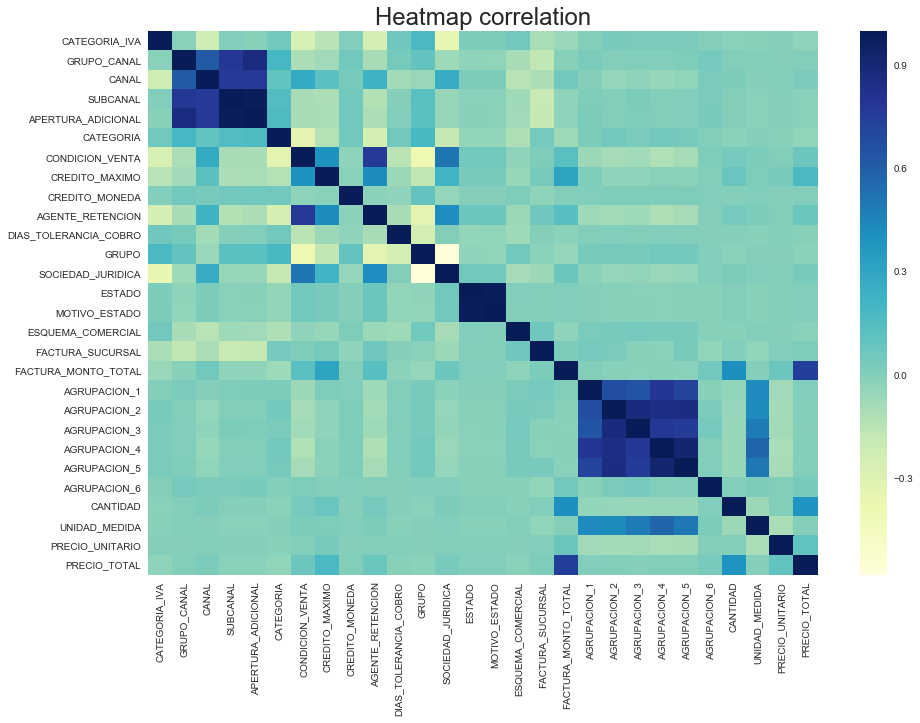

In [32]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [33]:
# Aqui podemos ver que algunas features tiene mucha correlacion entre si, como SOCIEDAD_JURIDICA y ser AGENTE_RETENCION.
# Lo mismo sucede con FACTURA_MONTO_TOTAL, CANTIDAD y PRECIO_TOTAL Y LAS AGRUPACIONES
# ESTADO Y MOTIVO_ESTADO
# Por lo que vamos a aplicar una técnica de embedding, PCA (Principal component analisis)

pca = PCA(n_components=17)
pca.fit(df)
df_reduced_pca = pca.transform(df)

In [34]:
df_corr.columns

Index(['CATEGORIA_IVA', 'GRUPO_CANAL', 'CANAL', 'SUBCANAL',
       'APERTURA_ADICIONAL', 'CATEGORIA', 'CONDICION_VENTA', 'CREDITO_MAXIMO',
       'CREDITO_MONEDA', 'AGENTE_RETENCION', 'DIAS_TOLERANCIA_COBRO', 'GRUPO',
       'SOCIEDAD_JURIDICA', 'ESTADO', 'MOTIVO_ESTADO', 'ESQUEMA_COMERCIAL',
       'FACTURA_SUCURSAL', 'FACTURA_MONTO_TOTAL', 'AGRUPACION_1',
       'AGRUPACION_2', 'AGRUPACION_3', 'AGRUPACION_4', 'AGRUPACION_5',
       'AGRUPACION_6', 'CANTIDAD', 'UNIDAD_MEDIDA', 'PRECIO_UNITARIO',
       'PRECIO_TOTAL'],
      dtype='object')

In [35]:
import numpy as np
# Vamos a volver a generar otro mapa de calor, par ver si la correlacion bajo y el PCA fue efectivo. 1677679
df_red =  pd.DataFrame(data=df_reduced_pca, columns=range(df_reduced_pca.shape[1]))
df_red.reset_index
df_red

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-5253.500724,-54.653940,49.899219,324.047645,-14.627053,-4.054721,-55.735075,-152.670073,-2.545654,24.502404,5.103767,-0.506765,0.874877,-1.369233,-0.678342,1.047910,0.571557
1,-5253.990748,-56.094894,36.624499,322.921606,-16.009414,-32.430910,121.884770,-152.916964,4.371632,-8.035032,0.373667,-0.525875,-0.070484,-1.606520,-0.663104,1.004899,0.555206
2,-5186.698345,129.111838,112.343082,-80.527922,-12.661228,-9.852609,-69.420408,8.230121,1.334470,4.392534,-25.699458,-0.813896,-1.198118,-0.190377,0.879234,-0.477521,-1.075001
3,-5186.407544,130.010050,120.036233,-80.080654,-6.241166,-11.094180,-128.194417,7.873128,-13.990390,10.798359,-24.735171,-0.951147,7.569764,-0.169856,0.987752,-0.335010,-0.915122
4,-2933.716546,-855.792492,134.607968,802.605499,-17.618983,-21.581173,45.064908,7.437574,-0.079657,29.591286,-0.079826,3.288261,-1.335596,-0.612041,-0.669746,1.236875,0.499965
5,-4782.178655,713.142637,-20.392470,336.943859,-7.507517,28.034661,-142.093338,9.692334,49.521550,3.018154,-25.582483,0.284489,-0.846054,1.128530,0.144047,0.204952,-1.328443
6,-4782.178655,713.142637,-20.392470,336.943859,-7.507517,28.034661,-142.093338,9.692334,49.521550,3.018154,-25.582483,0.284489,-0.846054,1.128530,0.144047,0.204952,-1.328443
7,-4611.738325,-212.582685,73.626676,81.637954,-14.934351,-16.186094,76.024097,6.695118,-21.753001,3.363636,-25.930430,-0.998388,-0.770188,0.670808,0.261109,-0.021636,-1.273689
8,-4611.417926,-211.636114,81.962079,82.430011,-9.777867,-0.255868,-54.707823,10.910208,82.832596,-3.238657,-27.683664,-0.708665,0.581985,0.470068,0.261773,0.049614,-1.179862
9,-4298.772522,1117.666728,167.532082,-301.621250,-27.096739,-24.310468,71.659312,8.152344,-21.496677,-1.937280,8.115856,-1.641300,-0.654982,1.204149,0.101308,0.349874,-0.758964


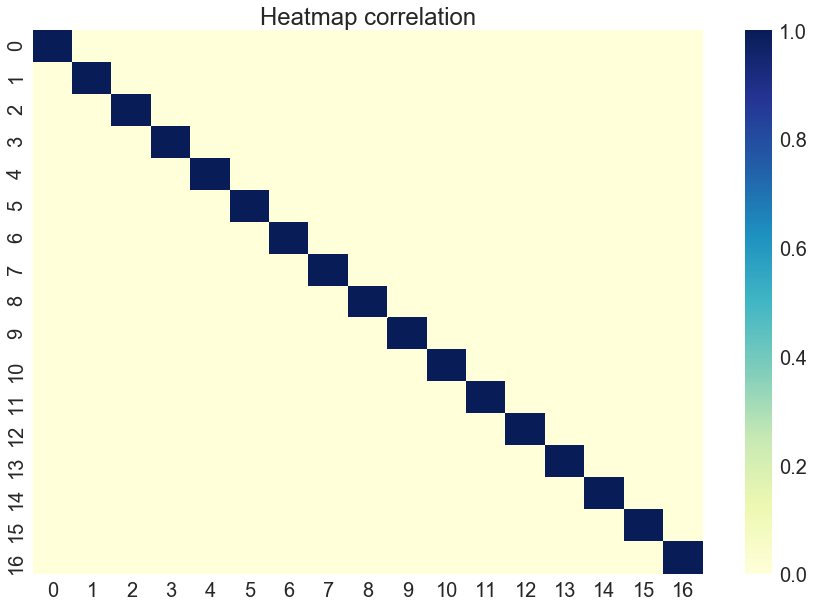

In [36]:
#Generamos un nuevo mapa de calor para ver corroborar que la correlacion entre columnas es baja!
# y efectivamente este metodo nos ayudo a reducir dimencionalidad sin tanta perdida de informacion
# ya que ahora estamos en otro espacio, sin tanta perdida de informacion

df_red_corr = df_red.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(df_red_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

# 3 - Proponer métricas de evaluación de soluciones de clustering basadas en testigos:

In [37]:
# Esto si podes fijate vos.

# 4 - Proponga alguna forma de obtener una muestra de los elementos de un cluster que sean cercanos al centroide:

In [38]:
# Esto lo veo yo.